# 1. 데이터 불러오기 및 탐색하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('trip.csv')

In [3]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 간단한 분석 브레인 스토밍

1. 탑승 시간(tpep_pickup_datetime)과 하차 시간(tpep_dropoff_datetime)이 문자열 타입이므로 datetime 타입으로 바꿔야 할 것이다.


2. 승객 이름 컬럼(passenger_name)은 중복 데이터를 확인한 이후 예측에 필요 없으므로 삭제한다.


3. passenger_count, trip_distance, fare_amount, tip_amount, tolls_amount 컬럼의 평균값을 확인해 보면 컬럼 사이 값의 범위에 큰 차이가 있는 것으로 보이지는 않는다. 예측모델을 만들 때 요금, 팁, 통행료는 통합하여 총 비용으로 만드는 것이 좋겠다.


4. 수치형 데이터들은 평균, 표준편차, 최대값을 보았을 때 편차가 큰 몇몇 데이터가 있을 것으로 생각된다.


5. fare_amount에 음수 값과 있으므로 추후 전처리한다.

# 2. 중복 확인 및 제거

In [6]:
# 1. 중복 데이터 확인

data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [7]:
# 2. 두 중복 데이터 Sarah Gross, Lisa Bullock 실제 확인하기

data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [8]:
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [9]:
# 3. 두 케이스 모두 각각 완전히 같은 중복 데이터가 있으므로 삭제

data = data.drop_duplicates()

In [10]:
# 4. 삭제된 데이터 확인

data
# 기존 22701개의 레코드가 두 개의 중복 데이터를 제거한 22699개 레코드로 변경

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


# 3. 결측치 확인 및 처리

In [11]:
# 1. 컬럼별 결측치 개수 확인

data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [12]:
# 2. 결측치 비율 확인

data.isna().mean() * 100

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013216
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [13]:
# 3. fare_amount 컬럼 확인

data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [14]:
# 4. 전체 레코드의 0.01%에 해당하는 작은 결측치이므로 삭제한다

data = data.dropna()
data
# 22699 - 3 = 22696 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


# 4-1. 이상치 탐지 및 처리 - passenger_count 컬럼

In [15]:
# 1. passenger_count 컬럼부터 확인  

data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

In [16]:
data['passenger_count'].value_counts()

1     16115
2      3305
5      1143
3       952
6       692
4       455
0        33
36        1
Name: passenger_count, dtype: int64

- 위 결과를 보면 36명은 잘못 입력한 갚으로 보인다.

- 6명을 잘못 입력했을 수 있고 3명을 잘못 입력했을 수도 있다.

- 쉽게 판단할 수 없으므로 이상치를 제거하기로 한다.

- 탑승객이 0명인 경우도 33개가 있으므로 확인해본다.

In [17]:
# 2. passenger_count가 6 이하인 레코드만 남김

data = data[data['passenger_count'] <= 6]
data['passenger_count'].value_counts()

1    16115
2     3305
5     1143
3      952
6      692
4      455
0       33
Name: passenger_count, dtype: int64

In [18]:
# 3. 탑승객이 0명인 행 33개 확인.

data[data['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [19]:
# 4. 탑승객의 이름은 그대로 있으므로 1명으로 값을 대체한다.

data.loc[data['passenger_count'] == 0, 'passenger_count'] = 1

# data['passenger_count'] = data['passenger_count'].replace(0, 1)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
# 5. 확인

data[data['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [21]:
data['passenger_count'].value_counts()

1    16148
2     3305
5     1143
3      952
6      692
4      455
Name: passenger_count, dtype: int64

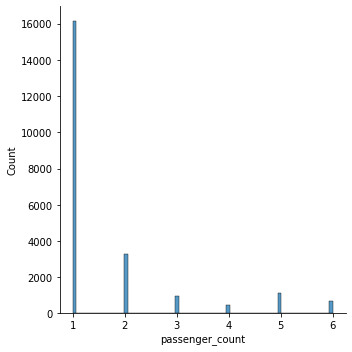

In [22]:
# 6. passenger_count의 분포를 히스토그램으로 확인

sns.displot(data['passenger_count'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count'>

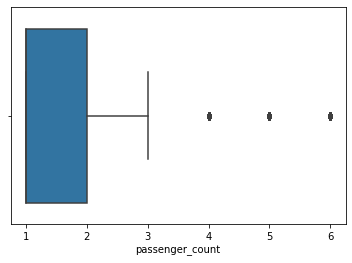

In [23]:
# 7. passenger_count의 분포를 박스플롯으로 확인

sns.boxplot(data['passenger_count'])

<AxesSubplot:ylabel='passenger_count'>

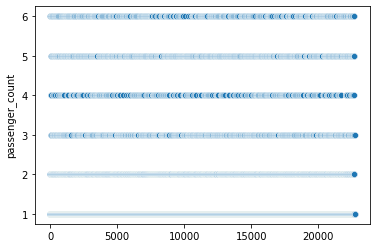

In [24]:
# 8. passenger_count의 분포를 산점도로 확인

sns.scatterplot(x = data.index, y = data['passenger_count'])

- 히스토그램, 박스플롯, 산점도를 보면 탑승객 5 ~ 6명은 충분히 자주 발생한 사건이고 택시가 크면 가능하므로 이상치로 분류하지 않기로 한다.

# 4-2. 이상치 탐지 및 처리 - trip_distance 컬럼

In [25]:
# trip_distance 컬럼 확인

data['trip_distance'].sort_values()

14374     0.00
4912      0.00
1277      0.00
22385     0.00
10283     0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22695, dtype: float64

- trip_distance에 0 인 값이 있으므로 확인해본다

In [26]:
data[data['trip_distance'] == 0].sort_values(by = 'trip_distance')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.00,0.00,0.0
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.0,1.00,0.00,0.0
14064,David Wilson,03/30/2017 7:56:31 PM,03/30/2017 7:56:31 PM,Cash,3,0.0,2.50,0.00,0.0
14167,Sheila Mack,10/29/2017 1:14:35 AM,10/29/2017 1:18:13 AM,Debit Card,1,0.0,4.80,1.32,0.0
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.0,0.01,0.00,0.0
...,...,...,...,...,...,...,...,...,...
6880,Daniel Martinez,08/17/2017 4:06:26 AM,08/17/2017 4:06:29 AM,Debit Card,4,0.0,98.50,0.00,0.0
6910,Amy Allen,03/26/2017 2:07:08 AM,03/26/2017 2:07:12 AM,Credit Card,1,0.0,18.00,2.00,0.0
7151,Alexander Robinson,10/18/2017 4:40:49 PM,10/18/2017 4:40:57 PM,Credit Card,6,0.0,2.50,0.00,0.0
7283,Phillip Vasquez,01/01/2017 3:02:53 AM,01/01/2017 3:03:02 AM,Credit Card,1,0.0,100.00,20.16,0.0


- trip_distance는 이후 예측 모델링을 할 때 중요한 변수로 사용할 것이므로 0 값인 레코드를 삭제하기로 한다.

In [27]:
data = data[data['trip_distance'] != 0]
data['trip_distance'].sort_values()

8199      0.01
5503      0.01
2987      0.01
19646     0.01
19829     0.01
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22547, dtype: float64

- trip_distance 컬럼은 연속형 데이터이므로 먼저 확률밀도함수의 분포를 확인한다

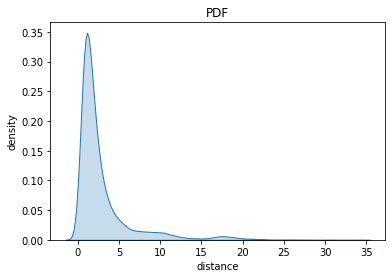

In [28]:
# 시리즈 데이터의 분포를 KDE 플롯으로 시각화
sns.kdeplot(data['trip_distance'], shade=True)

# 그래프 제목과 라벨 설정
plt.title("PDF")
plt.xlabel("distance")
plt.ylabel("density")

# 그래프 표시
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

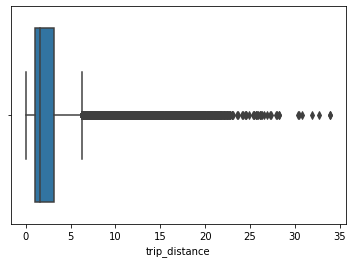

In [29]:
# trip_distance 분포를 박스플롯으로 확인

sns.boxplot(data['trip_distance'])

<AxesSubplot:ylabel='trip_distance'>

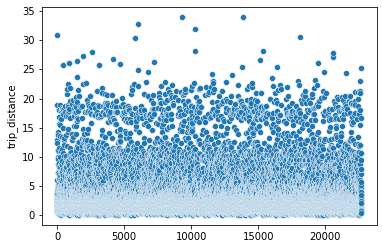

In [30]:
# trip_distance 분포를 산점도로 확인

sns.scatterplot(x = data.index, y = data['trip_distance'])

In [31]:
# z-score 확인

# z-score 함수 정의
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index

In [32]:
data.loc[outlier(data, 'trip_distance', 3)] 

# z-score가 3을 초과하는 레코드가 685개

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
11,Jamie Brown,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,Debit Card,2,18.90,52.0,14.58,5.54
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.0,18.56,11.52
33,Amy Larsen,07/26/2017 11:26:50 PM,07/26/2017 11:55:49 PM,Cash,1,14.32,40.5,0.00,0.00
111,Nathan Miller,06/03/2017 2:24:57 PM,06/03/2017 3:31:48 PM,Cash,1,18.00,52.0,0.00,0.00
157,David Brooks,12/11/2017 10:21:18 AM,12/11/2017 11:14:57 AM,Debit Card,1,15.60,51.5,11.60,5.76
...,...,...,...,...,...,...,...,...,...
22595,Joseph Weber,01/20/2017 6:05:09 PM,01/20/2017 7:12:50 PM,Cash,1,15.40,52.0,0.00,0.00
22606,Natasha Miller,03/12/2017 5:56:04 PM,03/12/2017 6:40:47 PM,Cash,2,23.00,52.0,0.00,5.54
22622,Jose Yates,06/19/2017 8:24:09 PM,06/19/2017 9:01:04 PM,Cash,3,20.96,52.0,5.50,0.00
22670,Shirley Ferguson,02/22/2017 6:45:04 AM,02/22/2017 7:19:34 AM,Debit Card,5,25.30,67.5,17.08,0.00


In [33]:
# z-score가 3을 초과하는 레코드 중 trip_distance의 최솟값을 확인

data.loc[outlier(data, 'trip_distance', 3)]['trip_distance'].min()

13.9

- trip_distance 컬럼의 확률밀도함수를 확인하면 오른쪽으로 지나치게 skewed되어 있으므로 z-score가 3을 초과하는 경우 이상치로 제거한다.

In [34]:
data = data[data['trip_distance'] < 13.9]
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.0
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.0
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.0
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.0


- z-score가 3을 초과하는 레코드를 제거한 후 trip_distance 컬럼의 확률밀도분포가 어떻게 변화했는지 확인해 본다.

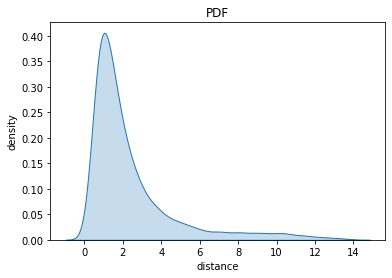

In [35]:
# 시리즈 데이터의 분포를 KDE 플롯으로 시각화
sns.kdeplot(data['trip_distance'], shade=True)

# 그래프 제목과 라벨 설정
plt.title("PDF")
plt.xlabel("distance")
plt.ylabel("density")

# 그래프 표시
plt.show()

- 여전히 오른쪽으로 심하게 기울어져 있으므로 한번더 z-score 3을 초과하는 레코드를 삭제한다.

In [36]:
data.loc[outlier(data, 'trip_distance', 3)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
22,Jacqueline Mclean DVM,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,Debit Card,1,12.30,68.25,12.00,16.26
56,Kristen Owens,08/17/2017 10:06:12 PM,08/17/2017 10:32:06 PM,Cash,1,11.07,32.50,6.76,0.00
79,Vincent Vargas,03/17/2017 10:00:41 PM,03/17/2017 10:22:57 PM,Credit Card,2,11.20,31.50,6.56,0.00
93,Elizabeth Summers,10/17/2017 2:29:39 PM,10/17/2017 3:00:14 PM,Credit Card,1,13.80,39.00,9.10,5.76
...,...,...,...,...,...,...,...,...,...
22490,Joshua Johnson,01/22/2017 1:14:54 PM,01/22/2017 1:52:02 PM,Credit Card,1,10.30,35.00,8.25,5.54
22501,Melissa Clark,10/11/2017 11:49:20 AM,10/11/2017 12:20:38 PM,Cash,1,10.80,33.50,10.00,5.76
22509,Michele Rios,06/30/2017 8:33:11 AM,06/30/2017 9:12:27 AM,Cash,4,11.80,40.50,11.75,5.76
22601,Scott Thomas,01/16/2017 11:18:36 AM,01/16/2017 11:43:14 AM,Cash,1,12.08,35.00,8.27,5.54


In [37]:
data.loc[outlier(data, 'trip_distance', 3)]['trip_distance'].min()

9.7

In [38]:
data = data[data['trip_distance'] < 9.7]
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.0
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.0
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.0
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.0


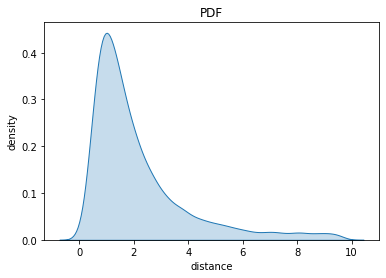

In [39]:
sns.kdeplot(data['trip_distance'], shade=True)

plt.title("PDF")
plt.xlabel("distance")
plt.ylabel("density")

plt.show()

<AxesSubplot:ylabel='trip_distance'>

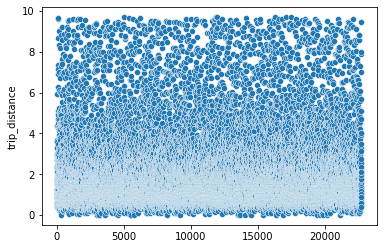

In [40]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

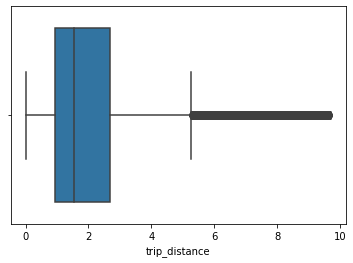

In [41]:
sns.boxplot(data['trip_distance'])

# 4-3. 이상치 탐지 및 처리 - fare_amount, tip_amount, tolls_amount 컬럼

## fare_amount

In [42]:
# fare_amount 컬럼부터 확인 

data['fare_amount'].sort_values()

12946   -120.00
20700     -4.50
11206     -4.50
14716     -4.00
17604     -4.00
          ...  
18539     62.50
11841     99.00
6710     100.00
3584     152.00
8478     999.99
Name: fare_amount, Length: 21160, dtype: float64

- 음수값이 포함된 것과 999.99 와 같이 매우 큰 값이 있다.
- 일단 음수값부터 확인해본다.

In [43]:
data[data['fare_amount'] < 0].sort_values(by = 'fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
20700,Nicole Pierce,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,Cash,1,0.70,-4.5,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
20319,Tyler Robinson,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,Debit Card,1,0.24,-3.5,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
18567,Selena Mann,05/22/2017 3:51:20 PM,05/22/2017 3:52:22 PM,Cash,1,0.10,-3.0,0.0,0.0


- fare_amount가 음수인 값은 양수로 전환해준다.
- fare_amount가 -120.0인 행은 trip_distance 0.17에 비해 비정상적이게 요금이 큰 값이므로 제거하기로 한다.

In [44]:
# 요금이 -120 인 행 제거
data = data[data['fare_amount'] != -120]

# 음수를 양수로 바꿈
data['fare_amount'] = data['fare_amount'].abs()

# 음수값이 남아있는지 확인
data[data['fare_amount'] < 0].sort_values(by = 'fare_amount')

/tmp/ipykernel_313/1687394454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fare_amount'] = data['fare_amount'].abs()


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [45]:
data['fare_amount'].sort_values()

19069      0.00
4404       0.00
4063       0.01
20135      2.50
3736       2.50
          ...  
18539     62.50
11841     99.00
6710     100.00
3584     152.00
8478     999.99
Name: fare_amount, Length: 21159, dtype: float64

- 조사해보면 미국의 택시 기본 요금은 보통 2.5 달러 이상이라고 한다.
- fare_amount가 2.5달러 이하인 값을 살펴보고 처리해보도록 하자.

In [46]:
data[data['fare_amount'] < 2.5]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.0,10.5
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.00,0.0,0.0
19069,Glenn Garrett,07/10/2017 2:40:09 PM,07/10/2017 2:40:59 PM,Cash,1,0.10,0.00,0.0,0.0


- 4063, 4404 레코드는 주행거리가 평균(2.91)보다 높은데 요금은 0.00이므로 잘못 입력된 데이터로 삭제하기로 한다.
- 19069 레코드는 기본 요금 2.5달러로 대체한다.

In [47]:
# 4063, 4404 행 제거
index_to_remove = [4063, 4404]
data = data.drop(index_to_remove)

# 19069 행 fare_amount를 2.5로 대체
data.loc[19069, 'fare_amount' ] = 2.5

# 확인 - 4063, 4404 행은 삭제했으므로 오류나는 것으로 확인함.
data.loc[19069]

passenger_name                   Glenn Garrett
tpep_pickup_datetime     07/10/2017 2:40:09 PM
tpep_dropoff_datetime    07/10/2017 2:40:59 PM
payment_method                            Cash
passenger_count                              1
trip_distance                              0.1
fare_amount                                2.5
tip_amount                                 0.0
tolls_amount                               0.0
Name: 19069, dtype: object

In [48]:
data['fare_amount'].sort_values()

16343      2.50
19069      2.50
14375      2.50
6702       2.50
316        2.50
          ...  
18539     62.50
11841     99.00
6710     100.00
3584     152.00
8478     999.99
Name: fare_amount, Length: 21157, dtype: float64

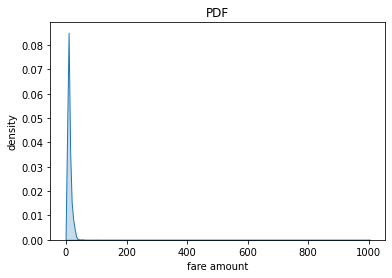

In [49]:
# fare_amount의 확률밀도함수로 분포 확인

sns.kdeplot(data['fare_amount'], shade=True)

plt.title("PDF")
plt.xlabel("fare amount")
plt.ylabel("density")

plt.show()

<AxesSubplot:ylabel='fare_amount'>

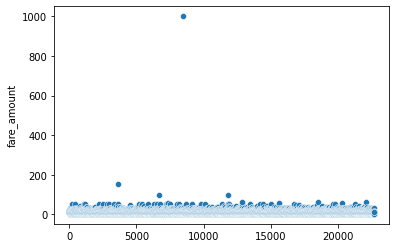

In [50]:
# fare_amount의 산점도 확인

sns.scatterplot(x = data.index, y = data['fare_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

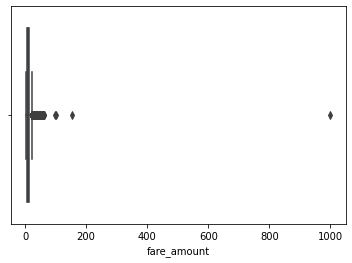

In [51]:
# fare_amount 분포를 박스플롯으로 확인

sns.boxplot(data['fare_amount'])

- fare_amount 데이터 중 레버리지가 너무 큰 값이 확인된다.
- 추후 회귀모델을 적용할 것이므로 요금이 62.5를 초과하는 값은 제거하는 것(sort_values()의 결과와 박스플롯을 확인한 것을 근거로)이 좋다고 생각한다(사실 데이터 크기가 크기 때문에 회귀모델에 큰 영향을 주지는 않을 것이지만 적당한 확률밀도함수의 모양을 보고 싶으므로 이상치를 제거하기로 한다.)

In [52]:
# fare_amount이 62.5을 초과하는 데이터 제거

data = data[data['fare_amount'] <= 62.5]
data['fare_amount'].sort_values()

18895     2.5
22037     2.5
1648      2.5
16343     2.5
21595     2.5
         ... 
7371     60.0
15624    60.0
12894    61.0
22144    62.0
18539    62.5
Name: fare_amount, Length: 21153, dtype: float64

<AxesSubplot:ylabel='fare_amount'>

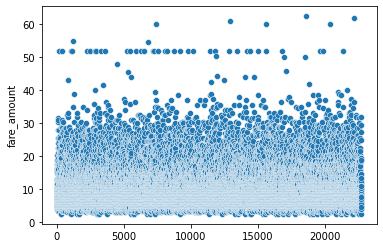

In [53]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

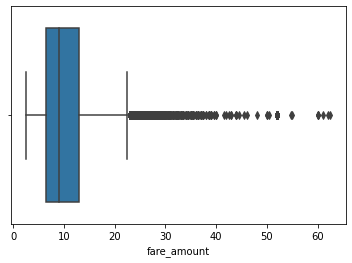

In [54]:
sns.boxplot(data['fare_amount'])

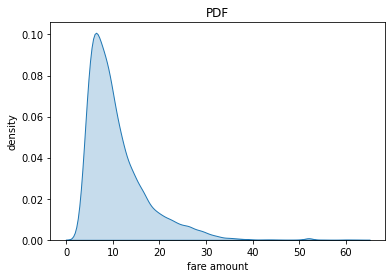

In [55]:
# 전처리한 fare_amount의 확률밀도함수로 분포 확인

sns.kdeplot(data['fare_amount'], shade=True)

plt.title("PDF")
plt.xlabel("fare amount")
plt.ylabel("density")

plt.show()

- 그럼에도 불구하고 확률분포상 지나친 극단값이 있으므로 z-sroce 3을 초과하는 값을 제거하기로 한다.

In [56]:
data.loc[outlier(data, 'fare_amount', 3)] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
48,Amber Wise,01/13/2017 2:37:24 AM,01/13/2017 3:17:34 AM,Debit Card,4,8.69,31.5,6.56,0.00
90,Mr. Paul Owens,03/10/2017 6:31:50 PM,03/10/2017 6:58:46 PM,Cash,1,9.60,30.5,0.00,0.00
102,Crystal Wright,03/31/2017 8:18:22 PM,03/31/2017 8:50:17 PM,Cash,3,9.67,31.0,8.08,0.00
162,Jonathan Flores,11/11/2017 8:16:16 PM,11/11/2017 8:17:14 PM,Credit Card,1,0.23,52.0,0.00,0.00
343,Julia Hunt,01/20/2017 5:48:11 PM,01/20/2017 6:27:15 PM,Debit Card,1,8.60,31.0,7.65,5.54
...,...,...,...,...,...,...,...,...,...
22281,Benjamin Myers,11/03/2017 8:17:40 PM,11/03/2017 8:50:44 PM,Cash,1,8.50,32.5,0.00,5.76
22322,Audrey King,08/25/2017 6:52:25 PM,08/25/2017 7:27:37 PM,Cash,1,9.12,32.0,6.76,0.00
22512,Michelle Adams,02/24/2017 10:19:09 PM,02/24/2017 10:55:18 PM,Debit Card,1,8.60,31.5,6.00,0.00
22514,David Thompson MD,06/03/2017 4:52:23 PM,06/03/2017 5:24:01 PM,Cash,1,8.84,30.0,2.00,0.00


In [57]:
data.loc[outlier(data, 'fare_amount', 3)]['fare_amount'].min()

30.0

In [58]:
data = data[data['fare_amount'] < 30.0]
data['fare_amount'].sort_values()

11359     2.5
16829     2.5
13994     2.5
1077      2.5
22104     2.5
         ... 
19364    29.5
2060     29.5
16141    29.5
14338    29.5
11890    29.7
Name: fare_amount, Length: 20827, dtype: float64

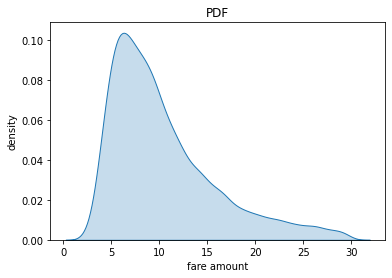

In [59]:
# s-score 처리 후 fare_amount의 확률밀도함수로 분포 확인

sns.kdeplot(data['fare_amount'], shade=True)

plt.title("PDF")
plt.xlabel("fare amount")
plt.ylabel("density")

plt.show()

<AxesSubplot:ylabel='fare_amount'>

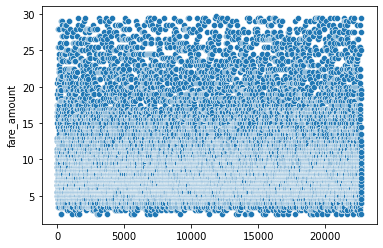

In [60]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

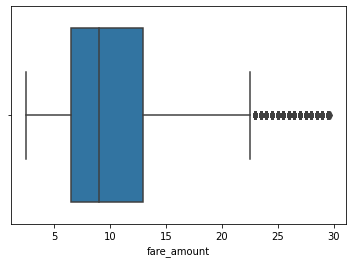

In [61]:
sns.boxplot(data['fare_amount'])

## tip_amount 탐색 및 이상치 처리

In [62]:
data['tip_amount'].sort_values()

11359     0.0
9504      0.0
9509      0.0
9511      0.0
9512      0.0
         ... 
9633     12.0
13388    13.0
20696    15.0
4730     15.0
17936    25.0
Name: tip_amount, Length: 20827, dtype: float64

In [63]:
data['tip_amount'].sort_values().tail(20)

10637    10.00
5382     10.00
14873    10.00
1732     10.00
12324    10.00
21982    10.00
12307    10.00
16855    10.00
6688     10.00
19095    10.00
7409     10.00
9002     10.07
9542     10.67
12109    10.67
18599    10.80
9633     12.00
13388    13.00
20696    15.00
4730     15.00
17936    25.00
Name: tip_amount, dtype: float64

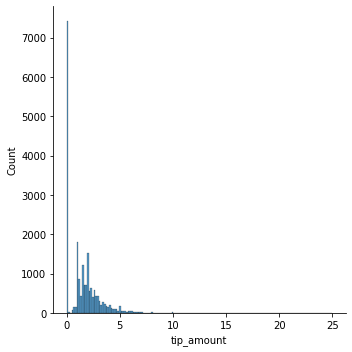

In [64]:
# 히스토그램으로 tip_amount의 분포 확인

sns.displot(data['tip_amount'])

- 미국에서 택시를 탈 때 팁을 주지 않는 경우가 많다는 점이 흥미롭다.

<AxesSubplot:ylabel='tip_amount'>

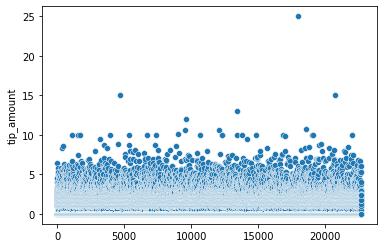

In [65]:
# tip_amount 분포를 산점도로 확인

sns.scatterplot(x = data.index, y = data['tip_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

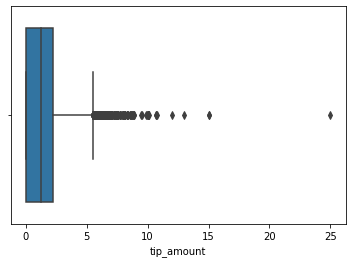

In [66]:
# tip_amount 분포를 박스플롯으로 확인

sns.boxplot(data['tip_amount'])

- tip_amount 또한 10을 넘는 값은 이상치로 보이므로 z-score를 확인해보기로 한다.

In [67]:
data.loc[outlier(data, 'tip_amount', 3)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
351,Jillian Le,12/12/2017 8:41:36 AM,12/12/2017 9:13:41 AM,Credit Card,5,6.98,27.0,8.34,0.0
433,Priscilla Rhodes,02/03/2017 3:44:26 PM,02/03/2017 4:25:06 PM,Debit Card,2,6.10,28.0,8.60,0.0
523,Cameron Francis,08/22/2017 8:52:44 AM,08/22/2017 9:27:02 AM,Cash,1,5.14,24.5,6.32,0.0
918,Lindsay Rhodes,09/27/2017 8:17:55 AM,09/27/2017 8:51:34 AM,Debit Card,1,5.10,23.5,6.08,0.0
...,...,...,...,...,...,...,...,...,...
22365,Marcus Ramirez,01/11/2017 10:52:05 AM,01/11/2017 11:22:45 AM,Credit Card,1,5.28,24.0,6.20,0.0
22449,Michael Becker,11/10/2017 4:49:31 PM,11/10/2017 5:20:22 PM,Credit Card,5,6.02,26.5,6.82,0.0
22626,Matthew Strickland,10/05/2017 4:14:08 PM,10/05/2017 4:47:45 PM,Cash,1,4.82,22.5,6.08,0.0
22629,Deborah Ruiz,03/09/2017 3:02:34 PM,03/09/2017 3:34:37 PM,Debit Card,1,4.20,21.5,6.69,0.0


In [68]:
# z-score가 3을 초과하는 tip_amount의 임계값
data.loc[outlier(data, 'tip_amount', 3)]['tip_amount'].min()

6.05

- 회귀 모델에 적용하기 위해 z-score가 3을 초과하는 값은 제거한다.

In [69]:
data = data[data['tip_amount'] < 6.05]
data['tip_amount'].sort_values()

8863     0.00
6067     0.00
6065     0.00
6064     0.00
12314    0.00
         ... 
17387    6.00
11676    6.00
19131    6.00
658      6.00
10716    6.01
Name: tip_amount, Length: 20588, dtype: float64

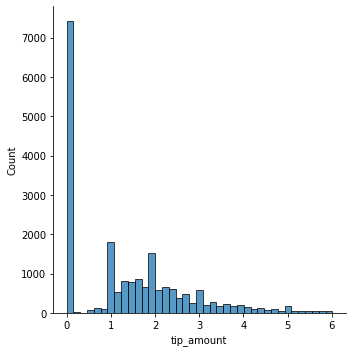

In [70]:
# 수정 후 tip_amount의 분포 확인

sns.displot(data['tip_amount'])

<AxesSubplot:ylabel='tip_amount'>

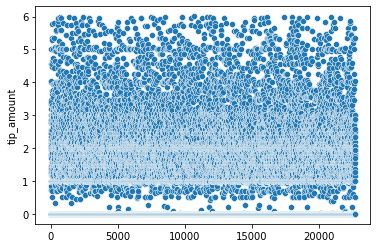

In [71]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

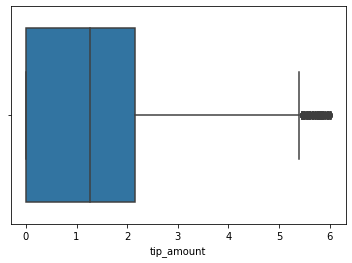

In [72]:
sns.boxplot(data['tip_amount'])

## tolls_amount

In [73]:
# tolls_amount 컬럼 확인

data['tolls_amount'].sort_values()

0        0.00
15138    0.00
15137    0.00
15136    0.00
15135    0.00
         ... 
15999    5.76
12787    5.76
10478    6.00
22563    6.32
5963     8.50
Name: tolls_amount, Length: 20588, dtype: float64

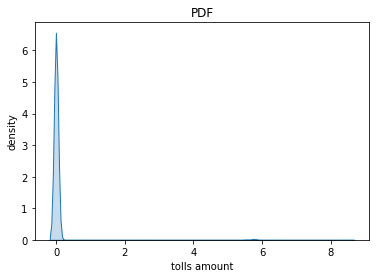

In [74]:
# tolls_amount의 분포 확인

sns.kdeplot(data['tolls_amount'], shade=True)

plt.title("PDF")
plt.xlabel("tolls amount")
plt.ylabel("density")

plt.show()

- tolls_amount 또한 지나치게 레버리지가 큰 값을 z-score 로 제거한다
- ** 시도 결과 모든 값이 0 으로 나와서 구간별 tolls_amount 값이 어떻게 분포해있는지 확인해본다.

In [75]:
toll_ctg = pd.cut(data['tolls_amount'], bins=5)
toll_ctg.value_counts().sort_index()

(-0.0085, 1.7]    20465
(1.7, 3.4]            2
(3.4, 5.1]            0
(5.1, 6.8]          120
(6.8, 8.5]            1
Name: tolls_amount, dtype: int64

- tolls_amount의 경우 2.5 ~ 6.3 사이에 120개의 레코드가 있다. 추후 요금, 팁, 통행료 컬럼을 합쳐 총 운임비용 컬럼으로 사용할 것이므로, tolls_amount 컬럼은 별다른 처리 없이 사용하기로 한다.

## 4-4. 세가지 비용 컬럼 합쳐 총 운행비용 컬럼 생성
### total_amount = fare_amount + tip_amount + tolls_amount

In [76]:
# 택시 총 운임비를 예측값으로 염두하고 예측 모델링을 위한 전처리 과정으로 
# 세 가지 요금 컬럼의 값을 합하여 total_amount 컬럼을 생성하기로 한다

data['total_amount'] = (data['fare_amount'] 
                       + data['tip_amount'] 
                       + data['tolls_amount'])

data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0,15.76
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0,20.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0,7.95
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0,16.50
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.0,2.06,0.0,11.06
...,...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.0,9.26
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.0,4.00
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.0,4.50
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.0,12.20


In [77]:
# total_amount 컬럼 확인

data['total_amount'].sort_values()

17749     2.50
13496     2.50
9190      2.50
7334      2.50
12336     2.50
         ...  
19131    39.76
2060     40.26
3117     40.26
12695    40.82
5963     40.83
Name: total_amount, Length: 20588, dtype: float64

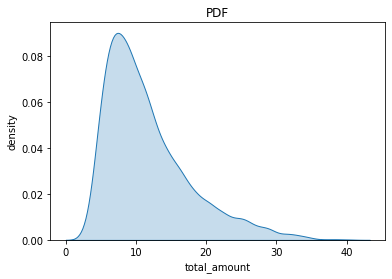

In [78]:
# total_amount 분포 확인

sns.kdeplot(data['total_amount'], shade=True)

plt.title("PDF")
plt.xlabel("total_amount")
plt.ylabel("density")

plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_amount'>

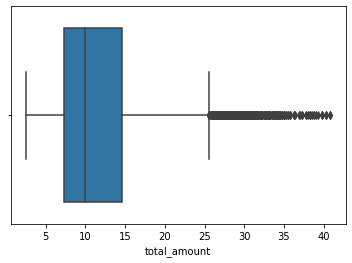

In [79]:
sns.boxplot(data['total_amount'])

<AxesSubplot:ylabel='total_amount'>

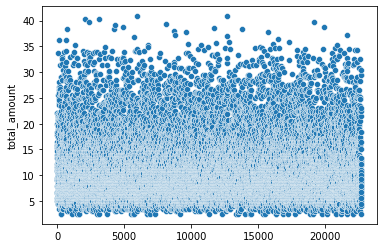

In [80]:
sns.scatterplot(x = data.index, y = data['total_amount'])

In [81]:
# z-score 확인

data.loc[outlier(data, 'total_amount', 3)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount
67,Thomas Johnson,12/12/2017 11:12:23 AM,12/12/2017 12:01:01 PM,Cash,1,3.10,28.0,5.76,0.00,33.76
180,Kerri Carey,12/27/2017 5:40:19 PM,12/27/2017 6:01:03 PM,Debit Card,1,8.32,25.5,5.00,5.76,36.26
233,Timothy Dodson,03/21/2017 11:24:31 AM,03/21/2017 11:49:47 AM,Credit Card,1,8.18,26.0,5.36,0.00,31.36
371,Jesus Miller,01/12/2017 9:24:01 PM,01/12/2017 10:00:29 PM,Cash,1,7.66,29.0,4.00,0.00,33.00
388,Melinda Smith,02/02/2017 12:34:02 PM,02/02/2017 1:02:11 PM,Cash,1,7.40,27.0,5.55,0.00,32.55
...,...,...,...,...,...,...,...,...,...,...
22346,Rhonda Morales,04/21/2017 9:04:37 AM,04/21/2017 9:37:22 AM,Debit Card,1,7.51,28.5,5.86,0.00,34.36
22372,Lori Clark,08/09/2017 12:24:11 PM,08/09/2017 12:52:34 PM,Debit Card,6,7.64,26.5,5.46,0.00,31.96
22523,Bianca Elliott,02/13/2017 11:52:39 AM,02/13/2017 12:21:17 PM,Debit Card,1,6.40,25.5,5.26,0.00,30.76
22560,Terry Benitez,09/18/2017 1:52:00 AM,09/18/2017 2:21:14 AM,Cash,1,8.80,28.5,4.00,0.00,32.50


In [82]:
data.loc[outlier(data, 'total_amount', 3)]['total_amount'].min()

30.0

- 이미 세가지 비용컬럼을 전처리 하는 단계에서 레버리지가 큰 데이터를 제거했으므로 일단 더 이상의 이상치 처리 없이 진행하기로 한다.

# 5-1. payment_method 컬럼의 Credit Card, Debit Card, 그리고 Cash 의 차이 시각화

In [83]:
# payment_method 별 지불 횟수 시각화

groups = []
for group, subset in data.groupby(by="payment_method"): 
    groups.append({
        'payment_method': group,
        'Count': len(subset),
    })
    
groups = pd.DataFrame(groups)
print(groups)

  payment_method  Count
0           Cash  10172
1    Credit Card   5168
2     Debit Card   5248


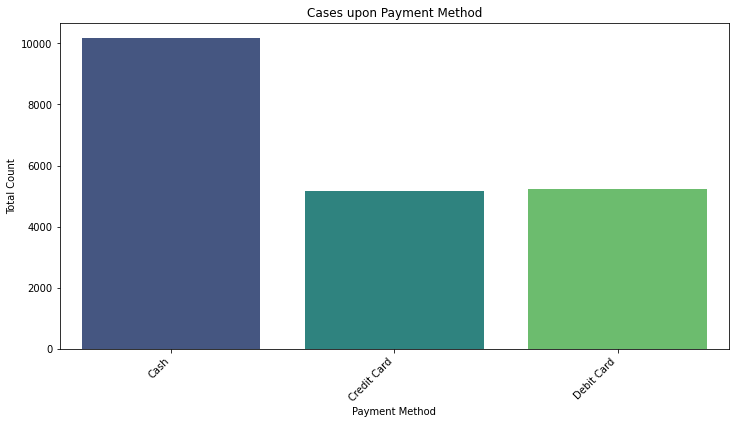

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_method', y='Count', data=groups, palette='viridis')
plt.title('Cases upon Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')  # X 축 레이블 회전
plt.show()

In [85]:
# payment_method 별 지불 총 비용 시각화

groups = []
for group, subset in data.groupby(by="payment_method"): 
    groups.append({
        'payment_method': group,
        'total_amount': sum(subset['total_amount']),
    })
    
groups = pd.DataFrame(groups)
print(groups)

  payment_method  total_amount
0           Cash     119012.33
1    Credit Card      61171.49
2     Debit Card      60300.39


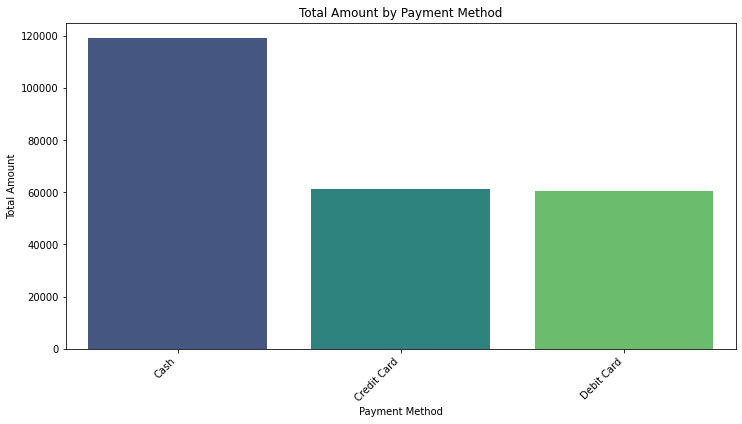

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(x='payment_method', y='total_amount', data=groups, palette='viridis')
plt.title('Total Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')  # X 축 레이블 회전
plt.show()

- Credit Card, Debit Card, Cash의 지불 횟수와 금액의 비율이 일치하는 것으로 나타났다.
- 현금과 카드 결제 비율을 약 1:1로 비슷하다.
- 2017년임에도 불구하고 현금으로 지불한 경우가 생각보다 많음을 알 수 있다. 미국과 한국의 문화적 차이가 있는 듯 하다..

# 5-2. Credit Card 와 Debit Card 를 "Card" 값으로 합치기

## Card = Credit Card + Debit Card

In [87]:
# 합치기 전 데이터 확인

data['payment_method'].value_counts()

Cash           10172
Debit Card      5248
Credit Card     5168
Name: payment_method, dtype: int64

In [88]:
# 합치기

data.loc[data['payment_method'].isin(['Debit Card', 'Credit Card']), 
         'payment_method'] = 'Card'

In [89]:
# 합친 후 확인

data['payment_method'].value_counts()

Card    10416
Cash    10172
Name: payment_method, dtype: int64

# 6-1. 날짜 데이터 datetime 타입으로 변경

In [90]:
from datetime import datetime

In [91]:
# Object형인 tpep_pickup_datetime, tpep_pickup_datetime 컬럼을
# datetime 타입으로 전환

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [92]:
# 확인

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20588 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         20588 non-null  object        
 1   tpep_pickup_datetime   20588 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  20588 non-null  datetime64[ns]
 3   payment_method         20588 non-null  object        
 4   passenger_count        20588 non-null  int64         
 5   trip_distance          20588 non-null  float64       
 6   fare_amount            20588 non-null  float64       
 7   tip_amount             20588 non-null  float64       
 8   tolls_amount           20588 non-null  float64       
 9   total_amount           20588 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 2.2+ MB


# 6-2. Datetime 타입 데이터로 운행 시간을 담은 새로운 변수 drive_time 컬럼 생성

In [93]:
# 운행 시간을 담은 drive_time 컬럼 생성

data['drive_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20588 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         20588 non-null  object         
 1   tpep_pickup_datetime   20588 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  20588 non-null  datetime64[ns] 
 3   payment_method         20588 non-null  object         
 4   passenger_count        20588 non-null  int64          
 5   trip_distance          20588 non-null  float64        
 6   fare_amount            20588 non-null  float64        
 7   tip_amount             20588 non-null  float64        
 8   tolls_amount           20588 non-null  float64        
 9   total_amount           20588 non-null  float64        
 10  drive_time             20588 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(2), timedelta64[ns](1)
memory usage: 2.4+ MB


- drive_time 컬럼을 생성하는 과정에서 자동으로 timedelta64 타입으로 컬럼이 생성되었다.
- drive_time 컬럼의 데이터를 탐색해본다.

In [95]:
# 새로 생성한 drive_time 컬럼 확인

data['drive_time'].sort_values()

9358    -1 days +23:43:01
20182     0 days 00:00:01
21595     0 days 00:00:02
22104     0 days 00:00:02
13308     0 days 00:00:02
               ...       
15165     0 days 23:58:33
22640     0 days 23:58:39
15000     0 days 23:58:51
15581     0 days 23:59:09
926       0 days 23:59:33
Name: drive_time, Length: 20588, dtype: timedelta64[ns]

- 마이너스 값, 매우 짧은 시간(1, 2초 등..), 24시간에 가까운 결과 등 이상한 결과가 바로 보이므로 세부적이게 데이터를 탐색하기로 한다.

In [96]:
data['drive_time'].sort_values().head(20)

9358    -1 days +23:43:01
20182     0 days 00:00:01
21595     0 days 00:00:02
22104     0 days 00:00:02
13308     0 days 00:00:02
13496     0 days 00:00:03
13764     0 days 00:00:03
17106     0 days 00:00:03
16829     0 days 00:00:03
2987      0 days 00:00:05
5503      0 days 00:00:06
1512      0 days 00:00:06
15348     0 days 00:00:07
22682     0 days 00:00:07
1077      0 days 00:00:09
11359     0 days 00:00:10
325       0 days 00:00:10
7334      0 days 00:00:11
13994     0 days 00:00:11
3736      0 days 00:00:12
Name: drive_time, dtype: timedelta64[ns]

In [97]:
data['drive_time'].sort_values().tail(20)

699     0 days 23:50:50
13798   0 days 23:50:51
5372    0 days 23:51:04
20689   0 days 23:51:16
18425   0 days 23:52:04
18545   0 days 23:52:55
10212   0 days 23:53:59
10931   0 days 23:55:07
8871    0 days 23:55:48
21513   0 days 23:56:27
21420   0 days 23:56:30
18652   0 days 23:56:58
6753    0 days 23:58:02
21368   0 days 23:58:16
7941    0 days 23:58:28
15165   0 days 23:58:33
22640   0 days 23:58:39
15000   0 days 23:58:51
15581   0 days 23:59:09
926     0 days 23:59:33
Name: drive_time, dtype: timedelta64[ns]

- 너무 짧거나 너무 긴 시간들이 있어 분 단위 float 형으로 바꿔 확률밀도분포를 확인해 보기로 한다

In [98]:
# 1) dt 메서드의 total_seconds() 속성으로 추출한 초 단위 시간을 60으로 나눠,
data['drive_time'] = (data['drive_time'].dt.total_seconds() / 60).round(2)

# 2) 실수형으로 변환
data['drive_time'] = data['drive_time'].astype(float)

# 3) 결과 확인
data['drive_time'].sort_values()

9358      -16.98
20182       0.02
21595       0.03
22104       0.03
13308       0.03
          ...   
15165    1438.55
22640    1438.65
15000    1438.85
15581    1439.15
926      1439.55
Name: drive_time, Length: 20588, dtype: float64

In [99]:
# 구간으로 나눠 데이터 분포 확인

dtime_ctg = pd.cut(data['drive_time'], bins=5)
dtime_ctg.value_counts().sort_index()

(-18.437, 274.326]     20549
(274.326, 565.632]         0
(565.632, 856.938]         0
(856.938, 1148.244]        0
(1148.244, 1439.55]       39
Name: drive_time, dtype: int64

- 일단 음수 값과 39개의 극단값을 제거

In [100]:
data = data[(data['drive_time'] >= 0) & (data['drive_time'] <1148)]
data['drive_time'].sort_values()

20182     0.02
21595     0.03
13308     0.03
22104     0.03
17106     0.05
         ...  
16141    48.53
67       48.63
8788     49.93
16163    50.12
20296    50.32
Name: drive_time, Length: 20548, dtype: float64

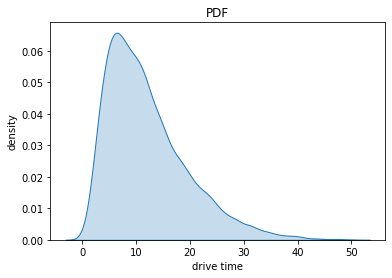

In [101]:
# 확률밀도함수로 분포 확인

sns.kdeplot(data['drive_time'], shade=True)

# 그래프 제목과 라벨 설정
plt.title("PDF")
plt.xlabel("drive time")
plt.ylabel("density")

# 그래프 표시
plt.show()

In [102]:
# 1분 미만의 지나치게 적은 운행 시간을 가진 레코드를 제거한다. 운행거리, 비용이 높은데 시간이 비상식적이게 짧은 경우가 다수 포함되있다.
data[data['drive_time'] < 1]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,drive_time
316,Tiffany Johnson,2017-12-13 02:02:39,2017-12-13 02:03:08,Cash,6,0.12,2.5,0.00,0.0,2.50,0.48
325,Valerie Mullen,2017-01-14 19:04:51,2017-01-14 19:05:01,Cash,2,0.02,2.5,0.00,0.0,2.50,0.17
1077,Kyle Johnson,2017-04-12 20:51:58,2017-04-12 20:52:07,Cash,1,2.30,2.5,0.00,0.0,2.50,0.15
1340,Amy Patterson MD,2017-03-05 21:46:08,2017-03-05 21:47:04,Cash,1,0.37,3.0,0.00,0.0,3.00,0.93
1496,Laura Hayes,2017-01-07 09:50:58,2017-01-07 09:51:57,Card,1,0.40,3.5,2.00,0.0,5.50,0.98
...,...,...,...,...,...,...,...,...,...,...,...
22037,Michael Singleton,2017-12-10 12:20:19,2017-12-10 12:20:56,Cash,1,0.09,2.5,0.00,0.0,2.50,0.62
22104,Renee Bowen,2017-07-11 14:42:04,2017-07-11 14:42:06,Card,1,1.10,2.5,0.00,0.0,2.50,0.03
22391,Jean Smith,2017-01-26 18:06:06,2017-01-26 18:06:58,Card,1,0.30,3.0,1.00,0.0,4.00,0.87
22525,Lisa Jacobs,2017-04-26 19:03:15,2017-04-26 19:03:38,Card,2,0.08,2.5,1.29,0.0,3.79,0.38


In [103]:
# 제거 및 확인
data = data[(data['drive_time'] >= 1)]
data[(data['drive_time'] < 1)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,drive_time


In [104]:
data['drive_time'].sort_values()

15492     1.00
4576      1.02
15127     1.02
10288     1.02
18567     1.03
         ...  
16141    48.53
67       48.63
8788     49.93
16163    50.12
20296    50.32
Name: drive_time, Length: 20478, dtype: float64

In [105]:
# z-score 확인
data.loc[outlier(data, 'drive_time', 3)]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,drive_time
67,Thomas Johnson,2017-12-12 11:12:23,2017-12-12 12:01:01,Cash,1,3.10,28.0,5.76,0.0,33.76,48.63
193,Samantha Miller,2017-09-15 19:17:58,2017-09-15 19:54:54,Cash,2,3.30,22.0,4.75,0.0,26.75,36.93
264,Elijah Erickson,2017-10-30 09:50:34,2017-10-30 10:32:09,Card,3,3.70,25.5,0.00,0.0,25.50,41.58
310,Drew Moss,2017-04-08 14:59:12,2017-04-08 15:37:07,Card,1,4.50,23.5,0.00,0.0,23.50,37.92
371,Jesus Miller,2017-01-12 21:24:01,2017-01-12 22:00:29,Cash,1,7.66,29.0,4.00,0.0,33.00,36.47
...,...,...,...,...,...,...,...,...,...,...,...
22185,Matthew Hall,2017-12-18 12:17:01,2017-12-18 12:51:55,Card,5,4.17,22.0,4.56,0.0,26.56,34.90
22242,Caroline Lee MD,2017-12-08 11:45:55,2017-12-08 12:22:01,Card,1,3.30,22.5,4.65,0.0,27.15,36.10
22294,Jacqueline Moore,2017-05-24 13:14:02,2017-05-24 13:53:08,Cash,6,2.97,23.0,0.00,0.0,23.00,39.10
22417,Dawn Jones,2017-11-03 10:29:26,2017-11-03 11:04:35,Cash,4,3.06,21.5,4.46,0.0,25.96,35.15


In [106]:
# Influencail한 데이터를 제거하기 위해 z-score 3을 초과하는 데이터를 제거한다.

data.loc[outlier(data, 'drive_time', 3)]['drive_time'].min()

34.72

In [107]:
data = data[data['drive_time'] < 34.72]
data['drive_time'].sort_values()

15492     1.00
4576      1.02
15127     1.02
10288     1.02
18567     1.03
         ...  
9449     34.62
185      34.63
20369    34.63
19964    34.65
10754    34.68
Name: drive_time, Length: 20236, dtype: float64

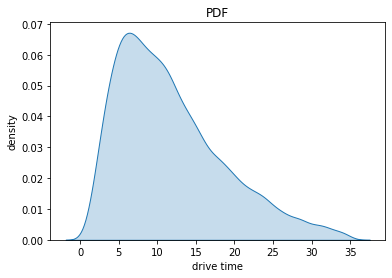

In [108]:
# 전처리한 확률밀도함수로 분포 확인

sns.kdeplot(data['drive_time'], shade=True)

# 그래프 제목과 라벨 설정
plt.title("PDF")
plt.xlabel("drive time")
plt.ylabel("density")

# 그래프 표시
plt.show()

- drive_time 컬럼은 회귀 모델을 준비하기 위한 예측변수로 활용할 것이기 때문에 실수형 그대로 두기로 한다.

# 7. 예측 모델링에 불필요한  컬럼 제거

In [109]:
# passenger_name 삭제
data.drop('passenger_name', axis = 1, inplace = True)

In [110]:
# total_amount 컬럼만 남기고 세가지 비용 컬럼은 삭제한다.
data.drop(['fare_amount', 'tip_amount', 'tolls_amount'], 
          axis = 1, inplace = True)

In [111]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,total_amount,drive_time
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,15.76,14.07
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,20.00,26.50
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,7.95,7.20
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.50,16.72
5,2017-03-25 20:34:11,2017-03-25 20:42:11,Card,6,2.30,11.06,8.00


# 8. total_amount, trip_distance, drive_time,  passenger_count 간의 상관관계 파악

In [112]:
# corr() 메서드로 상관관계 구하기

correlation_variables = ['total_amount', 'trip_distance',
                         'drive_time', 'passenger_count']

data[correlation_variables].corr() 

,total_amount,trip_distance,drive_time,passenger_count
total_amount,1.000000,0.901554,0.889554,0.005750
trip_distance,0.901554,1.000000,0.703242,0.015250
drive_time,0.889554,0.703242,1.000000,0.006942
passenger_count,0.005750,0.015250,0.006942,1.000000


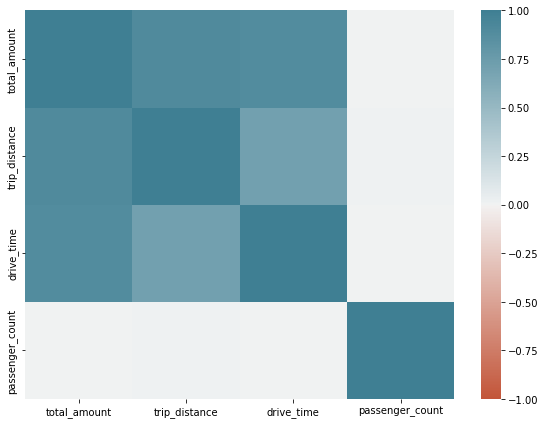

In [113]:
# 위 상관관계 시각화

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(data[correlation_variables].corr() ,
                 vmin=-1, vmax=1,      # 옆에 상관계수 범위 지정
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),   
                 # as_cmap=True 그림을 그리드로 나눠 표시, 
                 # 앞에 있는 20, 220은 색상을 정할 수 있음
                 ax=ax)

plt.tight_layout()
plt.show()

# Insight

1. 처음 전처리를 할 때 s-score method로 레버리지가 큰 이상치를 제거하지 않았을 때 total_amount와 trip_distance는 피어슨 계수가 1에 근접할 정도로 상관관계가 높았고, drive_time은 두 변수에 대해 피어슨 계수가 약 0.1로 거의 independent한 결과가 나왔다.


2. s-score method를 적용한 결과 total_amount, trip_distance, drive_time는 상식에 맞게 서로 적당히 강한 양의 상관관계를 나타내는 모습을 보인다.


3. 한편 passenger_count는 다른 모든 변수에 대해 상관관계가 거의 없이 나왔다.

# 9. 변수 별 상관관계 분석에 따른 선형회귀 모델링

In [114]:
from sklearn.linear_model import LinearRegression

## total_amount - trip_distance 단순 선형회귀

In [115]:
predictors = ['trip_distance']
outcome = 'total_amount'

model = LinearRegression()
model.fit(data[predictors], data[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 4.868
Coefficient Exposure: 3.336


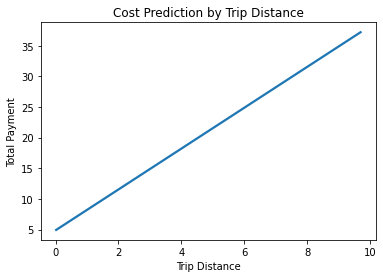

In [116]:
# 단순선형 회귀 직선
data_rg = data[['trip_distance', 'total_amount']]
sns.regplot(x='trip_distance', y='total_amount', 
            data=data_rg, order=1, ci=None, scatter=False)

# 그래프 제목과 라벨 설정
plt.title("Cost Prediction by Trip Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Total Payment")

# 그래프 표시a
plt.show()

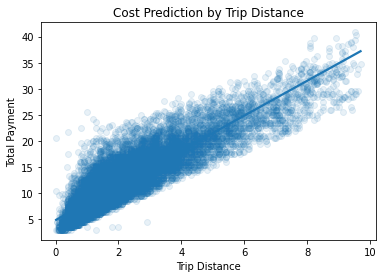

In [117]:
# 산점도를 포함한 단순선형 회귀 직선
data_rg = data[['trip_distance', 'total_amount']]

sns.regplot(x='trip_distance', y='total_amount',
            data=data_rg, order=1, ci=None,
            scatter_kws={'alpha': 0.1})

# 그래프 제목과 라벨 설정
plt.title("Cost Prediction by Trip Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Total Payment")

# 그래프 표시a
plt.show()

# Insight


1. 상관관계 분석에서 total_amount - trip_distance 사이 R 값은 0.9로, 이는 trip_distance 변수가 total_amount의 분산을 0.9**2 * 100 == 81% 만큼 설명함을 의미한다.


2. b_1는 3.336로 이는 운행거리가 1단위 증가할 때 총 금액은 평균적으로 3.336만큼 증가하는 것을 의미한다. 


3. b_0는 4.868로, b_0의 경우 운행거리가 0인 데이터를 제거했기 때문에 거리가 0일때 비용이 4.868이 된다는 것은 외삽의 결과라고 할 수 있다.

## total_amount - drive_time 단순 선형회귀

In [118]:
predictors = ['drive_time']
outcome = 'total_amount'

model = LinearRegression()
model.fit(data[predictors], data[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 2.736
Coefficient Exposure: 0.745


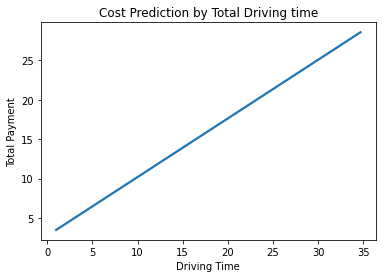

In [119]:
# 단순선형 회귀 직선
data_rg = data[['drive_time', 'total_amount']]
sns.regplot(x='drive_time', y='total_amount', data=data_rg, order=1, ci=None, scatter=False)

# 그래프 제목과 라벨 설정
plt.title("Cost Prediction by Total Driving time")
plt.xlabel("Driving Time")
plt.ylabel("Total Payment")

# 그래프 표시a
plt.show()

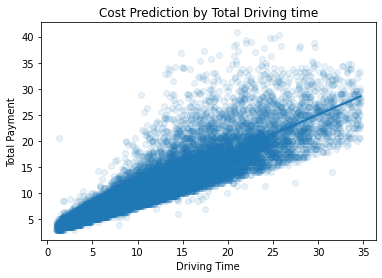

In [120]:
# 산점도를 포함한 단순선형 회귀 직선
data_rg = data[['drive_time', 'total_amount']]

sns.regplot(x='drive_time', y='total_amount',
            data=data_rg, order=1, ci=None,
            scatter_kws={'alpha': 0.1})

# 그래프 제목과 라벨 설정
plt.title("Cost Prediction by Total Driving time")
plt.xlabel("Driving Time")
plt.ylabel("Total Payment")

# 그래프 표시a
plt.show()

# Insight


1. 상관관계 분석에서 total_amount - drive_time 사이 R 값은 0.89로, 이는 drive_time 변수가 total_amount의 분산을 0.89**2 * 100 == 79% 만큼 설명함을 의미한다.


2. b_1는 0.745로 이는 운행시간가 1단위 증가할 때 총 금액은 평균적으로 0.745만큼 증가하는 것을 의미한다. 


3. b_0는 2.736로, b_0의 경우 운행시간이 1분 미만인 데이터를 제거했기 때문에 운행시간이 0일때 비용이 2.736이 된다는 것은 외삽의 결과라고 할 수 있다. 그러나 운행시간의 경우 미국 택시 평균 기본 운임이 약 2.5 ~ 3.0 달러라는 점을 생각하면 괜찮은 fitting 결과라고 생각할 수도 있다.

# Conclusion


1. 기본적으로 trip_distance와 drive_time의 total_amount에 대한 0.9에 근사한 상관관계는 두 변수가 반응변수에 대해 강한 선형 관계를 가지고 있음을 나타낸다.


2. 하지만 total_amount - drive_time의 산점도를 보면 total_amount - trip_distance의 산점도에 비해 예측변수의 값이 커짐에 따라 잔차의 분산이 커지는 것을 볼 수 있다. 이는 택시 비용을 예측하고자 할 때 운행시간에 따른 모델은 운행시간이 지남에 따라 예측의 불확실성이 증가하게 됨을 의미한다.


3. 반면 total_amount - trip_distance의 데이터 포인트는 예측변수 값의 변화에 따라 잔차의 분산이 일정한 모습을 보인다. 따라서 택시 비용을 예측할 때 운행시간에 따른 예측보다 예상 거리에 따른 예측이 비교적 더 일관성이 있다고 결론을 지을 수 있다.

# 회고

1. 데이터 분석 목적(변수들 간의 관계 설명 또는 예측 모델링)에 따라 데이터를 전처리하는 것, 특히 이상치를 어떻게 처리해야 할 것인지와 변수 간 스케일링을 어떻게 해야할지 많은 생각을 하게 되었다. 이 부분에 대해 논리적이고 과학적인 전개 과정을 앞으로 더 공부해야 겠다는 인식과 목표가 생겼다.


2. 다중선형회귀를 통해 변수간의 관계 설명과 예측에 대해 시도해보고 싶었지만 아직 이 부분에 대한 공부가 준비되지 않은 것 같다. 막상 모델링을 하려고 보니 회귀에 대한 이해도가 부족하는 점을 스스로 느끼게 되었다.


3. 탐색적 데이터 분석 단계에서 실제 데이터의 이상한 점을 발견했을 때 어떻게 대처해야 할지 생각하는 것이 괴로웠다. 이 부분에서 왜 데이터 분석에 도메인 지식이 필요하고 중요하다고 하는지 이해하게 되었다.


4. 프로젝트를 수행하면서 분명 많은 오류와 시행착오, 해결과정이 있었는데 너무 많다보니, 이러한 것을 일일이 남기기 보다 어떻게 논리를 전개하고 보기 쉽고 간결하게 작성할 것인지로 초점이 바뀌게 되었다. 사소한 문제에 너무 매몰되기보다 논리적이고 가치있는 분석결과를 간결하게 작성하기 위해 노력해야 할 것 같다.


5. 데이터 분석의 결론을 이끌어내는 부분이 어려웠다. 일단은 지금까지 조금 배운 것들을 활용해서 내가 할 수 있는 수준의 결과를 시도해보았다.